In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostClassifier

import random

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])
dfs = df.sample(frac=0.1, replace=True, random_state=1)
dfs = dfs[dfs['rejected'] == False]
dfs['pcn'].fillna('gp_'+df['group'], inplace=True)
dfs =dfs.drop(columns=['group'])
dfs['pcn'].fillna(value = 'None', inplace = True)

In [4]:
train_data = dfs.drop(columns=['patient_pay'])
train_label = dfs['patient_pay']

In [5]:
train_pool = Pool(train_data, train_label, cat_features = [0,1,2,3,4,5,6,7])

In [8]:
from catboost import CatBoost

In [17]:
model = CatBoost({'iterations':100})
model.fit(train_pool)
pred = model.predict(train_pool, prediction_type='RawFormulaVal')
print(pred)

Learning rate set to 0.5
0:	learn: 32.1709810	total: 634ms	remaining: 1m 2s
1:	learn: 26.6267942	total: 1.28s	remaining: 1m 2s
2:	learn: 22.9317835	total: 1.82s	remaining: 58.9s
3:	learn: 20.1429998	total: 2.28s	remaining: 54.7s
4:	learn: 19.2651180	total: 2.7s	remaining: 51.4s
5:	learn: 18.9330006	total: 3.12s	remaining: 48.9s
6:	learn: 18.6730749	total: 3.55s	remaining: 47.1s
7:	learn: 18.4408260	total: 4.02s	remaining: 46.3s
8:	learn: 18.3569912	total: 4.46s	remaining: 45.1s
9:	learn: 17.6752744	total: 4.89s	remaining: 44s
10:	learn: 17.5606577	total: 5.38s	remaining: 43.5s
11:	learn: 17.4070552	total: 5.8s	remaining: 42.6s
12:	learn: 17.2502040	total: 6.23s	remaining: 41.7s
13:	learn: 17.2007264	total: 6.73s	remaining: 41.3s
14:	learn: 17.1401384	total: 7.16s	remaining: 40.6s
15:	learn: 17.0850379	total: 7.6s	remaining: 39.9s
16:	learn: 17.0501735	total: 8.05s	remaining: 39.3s
17:	learn: 17.0029386	total: 8.48s	remaining: 38.6s
18:	learn: 16.9436879	total: 8.89s	remaining: 37.9s
19

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        4.00000e+00, 2.00000e+00, 7.00000e+00, 2.90000e+01, 4.20000e+01,
        5.80000e+01, 2.48000e+02, 2.01000e+02, 3.53000e+02, 3.25000e+02,
        5.45000e+02, 4.06000e+02, 9.29000e+02, 9.52000e+02, 9.87000e+02,
        4.77000e+02, 7.88000e+02, 1.73900e+03, 2.43800e+03, 2.60500e+03,
        2.31100e+03, 3.76400e+03, 8.32800e+03, 2.37220e+04, 8.17860e+04,
        7.40435e+05, 2.11366e+05, 2.56180e+04, 1.54880e+04, 9.76100e+03,
        3.98500e+03, 2.83200e+03, 2.87500e+03, 1.51500e+03, 5.86000e+02,
        4.51000e+02, 3.14000e+02, 1.77000e+02, 2.28000e+02, 1.50000e+02,
        5.70000e+01, 5.60000e+01, 1.00000e+01, 1.10000e+01, 1.70000e+01,
        8.90000e+01, 3.70000e+01, 4.60000e+01, 3.20000e+01, 7.70000e+01,
        4.80000e+01, 1.31000e+02, 2.90000e+01, 5.80000e+01, 6.50000e+01,
        9.40000e+01, 8.00000e+01, 1.20000e+02, 2.44000e+02, 1.55000e+02,
        8.90000e+01, 1.70000e+01, 1.26000e+02, 6.30

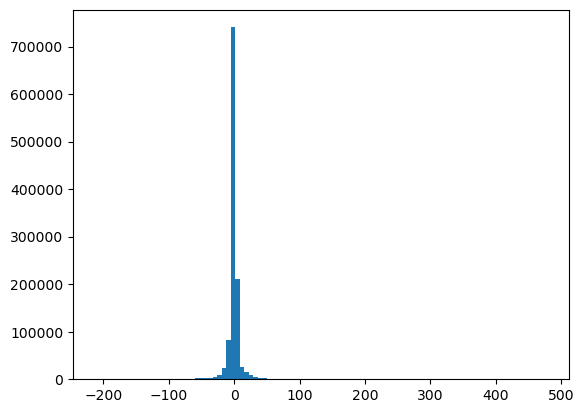

In [18]:
diff = train_label - pred
plt.hist(diff, bins=100)

In [19]:
diff.describe()

count    1.151369e+06
mean    -5.769016e-02
std      1.596484e+01
min     -2.121420e+02
25%     -1.860905e+00
50%     -8.788705e-02
75%      1.472540e+00
max      4.772732e+02
Name: patient_pay, dtype: float64